In [54]:
#data loading
import pandas as pd
filename="/content/apple_quality.csv"
a=pd.read_csv(str(filename))

print(a)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
0    -0.491590    good  
1

In [55]:
##Checking for null values
a.isna().sum()

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


In [56]:
#Column numbers to fill 0
fillIntColumns={0,1,2,3,4,5,6}
for x in fillIntColumns:
  a[a.columns[x]]=a[a.columns[x]].fillna(0)

#Fill Quality column with "0"
a["Quality"]=a["Quality"].fillna("0")

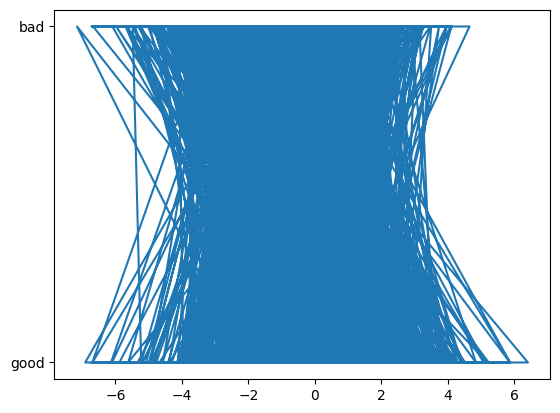

In [57]:
#Plotting using pyplot
from matplotlib import pyplot as plt
target="Quality"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 4000 artists>

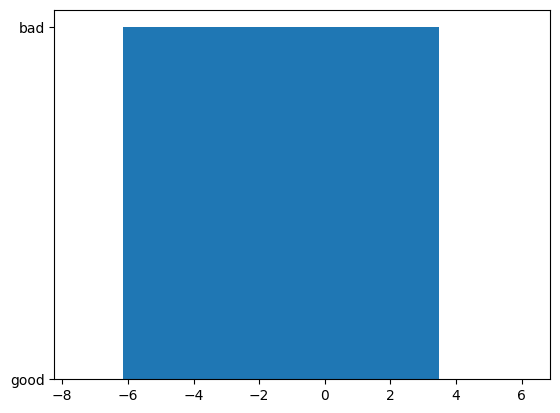

In [58]:
#Bar plot
plt.bar(a[a.columns[2]],a[str(target)])

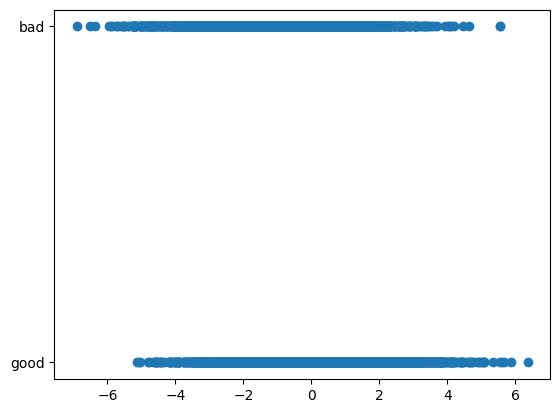

In [59]:
#Scatter plot
plt.scatter(a[a.columns[3]], a[str(target)])

In [60]:
#Convert String value to integer for Quality column
from sklearn.preprocessing import LabelEncoder
b = LabelEncoder()

a[str(target)] = b.fit_transform(a[str(target)])

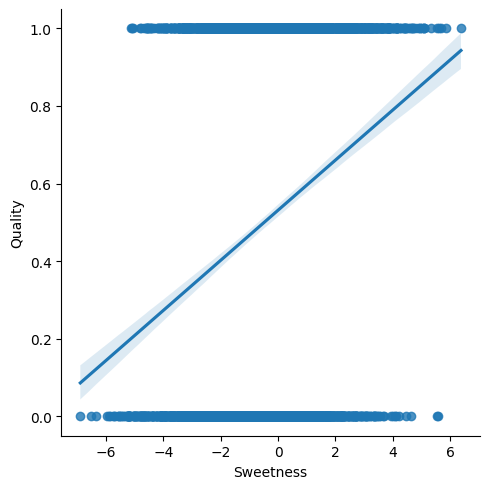

In [61]:
#Seaborn lmplot
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="Sweetness",y=str(target),data=a)

<Axes: xlabel='Juiciness', ylabel='Quality'>

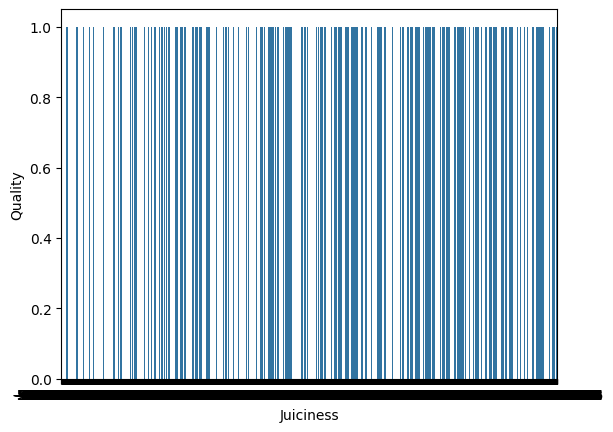

In [62]:
#SNS bar plot Quality vs juciness
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='Weight', ylabel='Quality'>

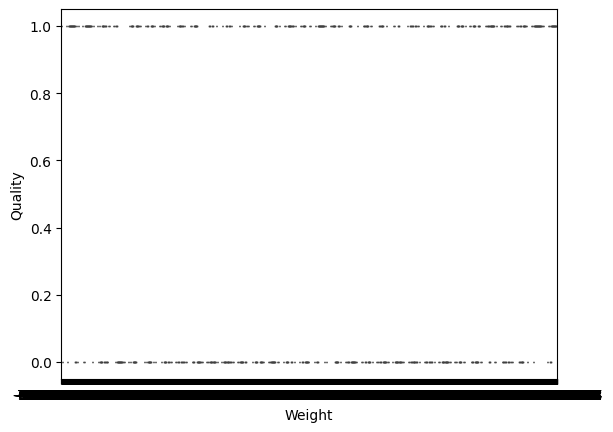

In [63]:
#Box plot for Quality versus Weight
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-64-c8cda8a0dbfb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='Quality', ylabel='Density'>

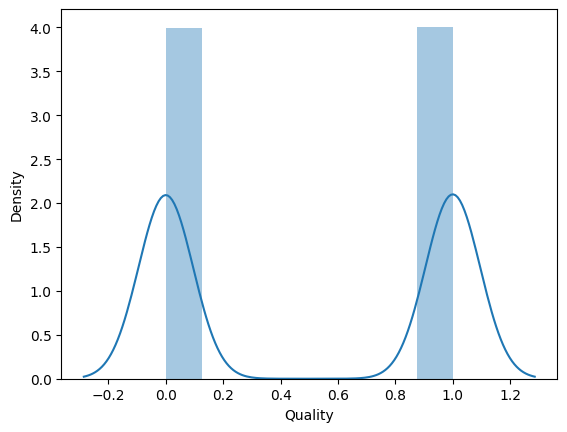

In [64]:
#Dist plot for quality
sns.distplot(a[str(target)])

<Axes: xlabel='Size', ylabel='Density'>

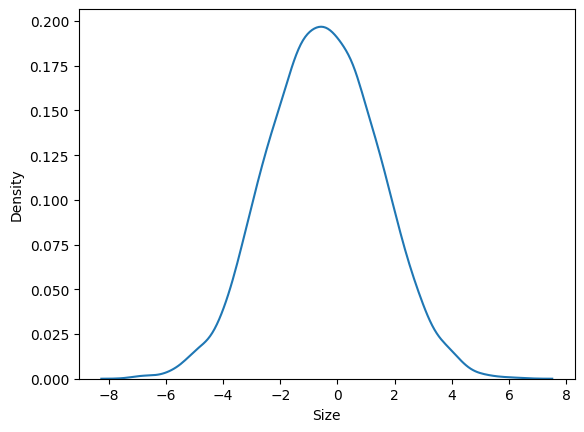

In [65]:
#Kde plot for size
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='Crunchiness', ylabel='count'>

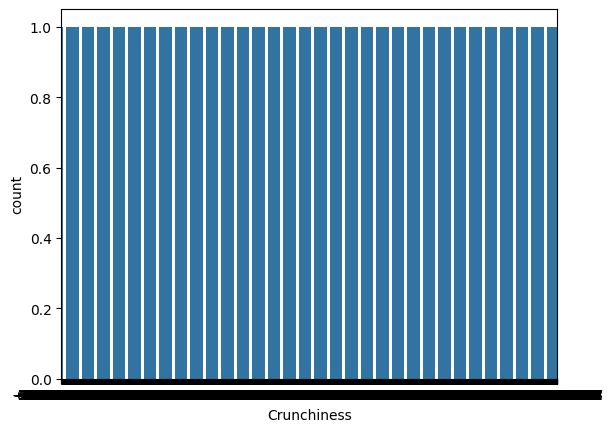

In [66]:
#Count plot for crunchiness
sns.countplot(x=a.columns[4],data=a)

<Axes: >

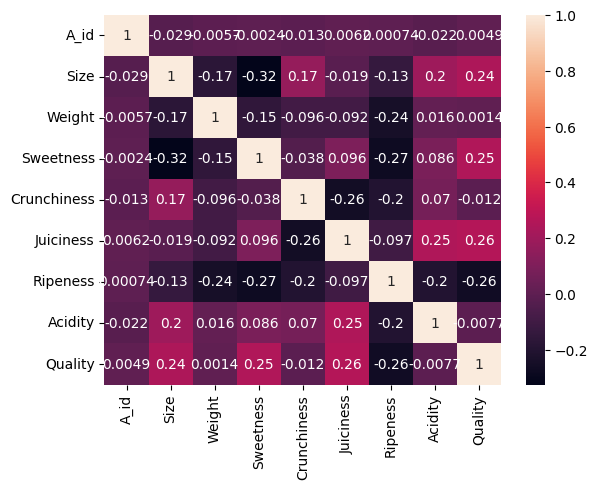

In [67]:
#Heatmap of data
import numpy as np
data=a.select_dtypes(include=np.number).corr()
#data=a.corr()

sns.heatmap(data, annot=True)

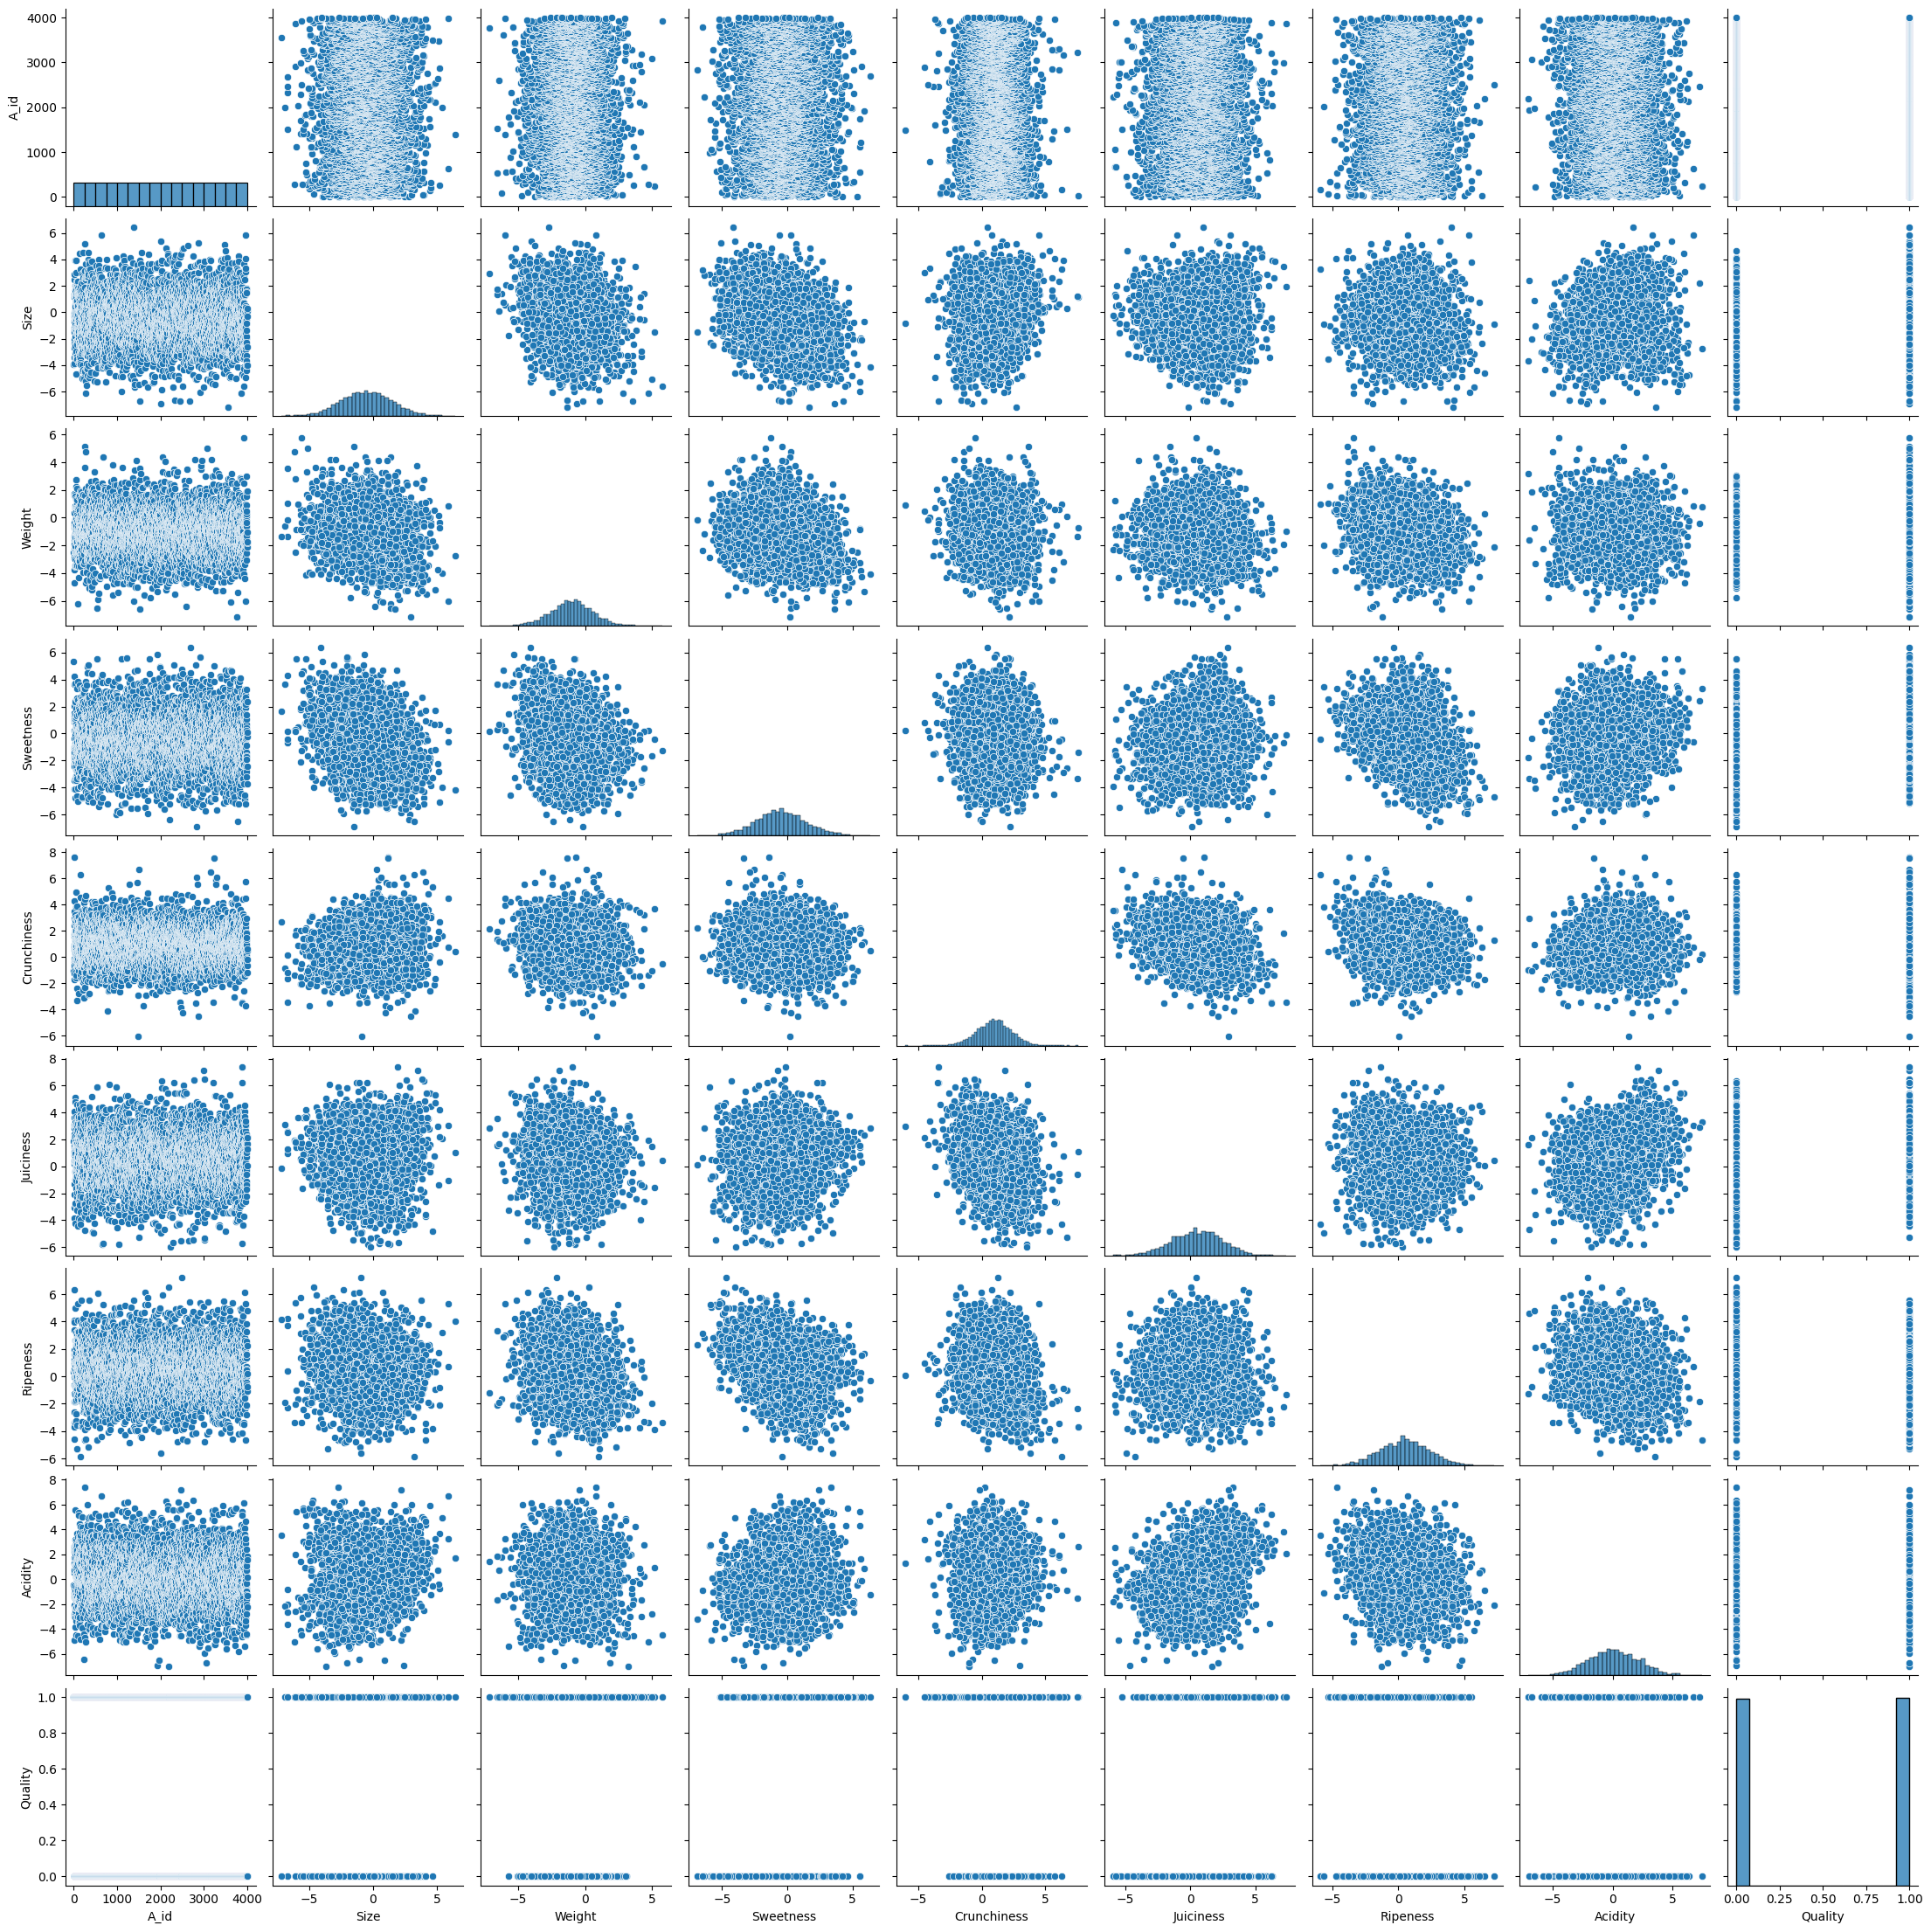

In [68]:
#SNS pairplot
sns.pairplot(data=a)

In [69]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
0    -0.491590  
1    -0.722809  


In [70]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64


In [71]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
print(x_train)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1225  1225 -0.672325 -0.929960   1.396177     1.679202   0.345572  1.927739   
3283  3283 -2.632866 -3.854800   0.735692     1.310519  -1.107188  0.258453   
512    512  3.494801 -2.643742   0.419280     3.645718  -3.285316 -2.297288   
528    528  0.063682  0.388509  -0.695765     2.400067   0.771042  1.010399   
2964  2964  0.962091 -4.516877  -0.156611     1.404099   1.729481 -1.406990   
...    ...       ...       ...        ...          ...        ...       ...   
3156  3156 -0.013655 -1.087966  -1.956035     1.994036  -2.108648 -0.418797   
2015  2015  0.476745 -2.931691  -0.319191     0.730417  -2.869796 -0.001725   
2873  2873 -0.853206 -0.837726  -1.424906    -0.312684  -0.952663 -0.197801   
2369  2369 -2.884037 -1.277148  -2.992238     0.549697  -1.074681  2.753791   
2374  2374  0.500270 -1.842282   1.410977    -0.508555  -1.019181 -1.021734   

       Acidity  
1225  1.436965  
3283 -4.926745  


In [73]:
print(y_train)

1225    1
3283    0
512     0
528     1
2964    1
       ..
3156    1
2015    0
2873    1
2369    0
2374    1
Name: Quality, Length: 3200, dtype: int64


In [74]:
print(x_test)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2548  2548  2.955488 -4.794293  -2.326891     2.133141   2.313076 -0.152156   
75      75  2.160592 -1.608128  -3.149540     1.354258   2.169309  0.561455   
3782  3782  0.683614 -0.625453   1.284087     0.770129   2.527534 -2.814110   
2508  2508 -2.655813 -0.911280  -0.466663     0.693189  -1.791322  0.944974   
311    311 -2.994521 -0.240735   1.273841    -0.143859   2.207348  0.181571   
...    ...       ...       ...        ...          ...        ...       ...   
713    713 -0.435186  0.451229  -0.984333     0.975638   0.365460  0.514146   
2028  2028 -2.024398 -2.344176  -0.223759    -0.468512   5.812242  0.784823   
335    335  1.418064 -0.159780   0.137655     0.626106  -1.481344 -1.945741   
3435  3435  0.165069 -3.453787   1.201437    -1.233667   1.050820 -1.576021   
1295  1295 -3.623726 -1.644889   3.326589    -0.022213   0.692019 -0.195724   

       Acidity  
2548  0.397002  
75    1.466044  


In [75]:
print(y_test)

2548    1
75      1
3782    1
2508    0
311     1
       ..
713     0
2028    0
335     0
3435    1
1295    1
Name: Quality, Length: 800, dtype: int64


In [76]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
print(ypred)

[1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 

In [79]:
#Print accuracy score
from sklearn.metrics import accuracy_score
#y_test=y_test.astype('int')
print(accuracy_score(y_test,ypred))

0.755


In [80]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[305 104]
 [ 92 299]]


In [82]:
print(model.predict([[2548,2.955488,-4.794293,-2.326891,2.133141,2.313076,-0.152156,0.397002]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [83]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [84]:
print(ypred)

[1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 0 1 0 1 

In [85]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.79375


In [86]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[332  77]
 [ 88 303]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       409
           1       0.80      0.77      0.79       391

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



In [89]:
print(model.predict([[2548,2.955488,-4.794293,-2.326891,2.133141,2.313076,-0.152156,0.397002]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [91]:
print(ypred)

[1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 

In [92]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8725


In [93]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[351  58]
 [ 44 347]]


In [94]:
print(model.predict([[2548,2.955488,-4.794293,-2.326891,2.133141,2.313076,-0.152156,0.397002]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       409
           1       0.86      0.89      0.87       391

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

